## Load and Visualize the X-ray

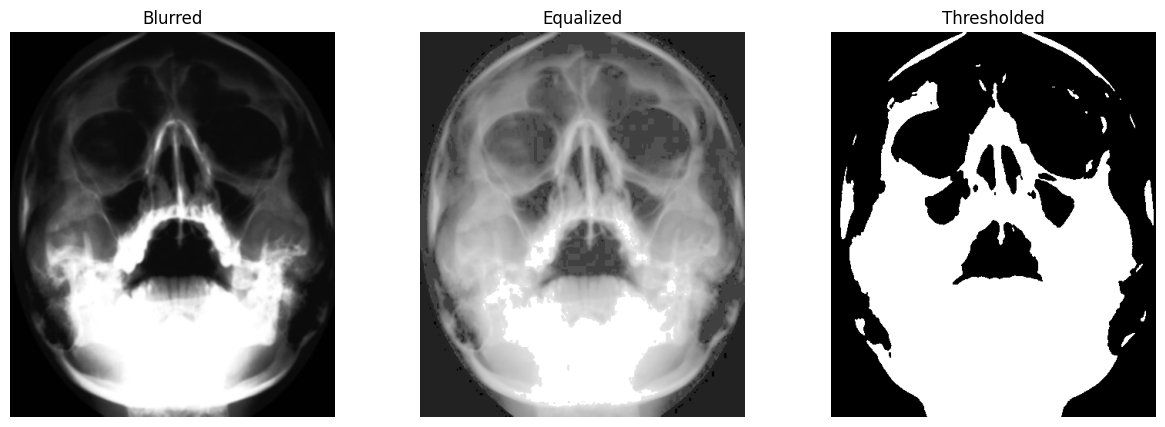

In [13]:
 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the X-ray image
image_path = r"E:\SLIIT\__4th_Year\Research Project - IT4010\Dataset - Waters View Sinus X Ray\test\healthy\h6 (2).jpg"
xray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(xray_image, (5, 5), 0)

# Perform histogram equalization to enhance contrast
equalized = cv2.equalizeHist(blurred)

# Threshold the image to extract sinus areas (use Otsu's method)
_, thresholded = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show preprocessed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Blurred")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Equalized")
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Thresholded")
plt.imshow(thresholded, cmap='gray')
plt.axis('off')

plt.show()



## Detect Contours

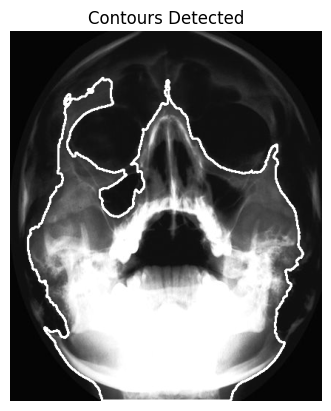

In [14]:
# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy of the original image for drawing
contour_image = xray_image.copy()

# Filter contours based on area (to focus on sinus regions)
min_area = 1000  # Adjust based on image resolution
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Draw filtered contours
cv2.drawContours(contour_image, filtered_contours, -1, (255, 255, 255), 2)

# Show image with contours
plt.title("Contours Detected")
plt.imshow(contour_image, cmap='gray')
plt.axis('off')
plt.show()


## Identify Maxillary Sinus

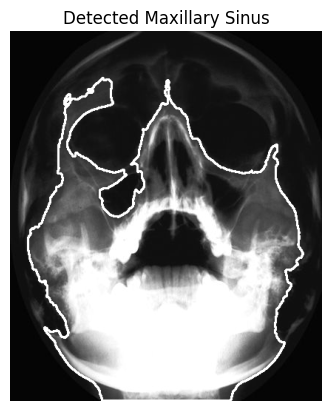

In [15]:
# Define the approximate region of the maxillary sinus (e.g., lower half of the image)
height, width = xray_image.shape
lower_half = height // 2

# Filter contours by location (e.g., below the midpoint of the image)
maxillary_contours = [
    c for c in filtered_contours if cv2.boundingRect(c)[1] > lower_half and cv2.boundingRect(c)[0] < width // 2
]

# Extract bounding boxes of detected maxillary regions
for contour in maxillary_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(contour_image, (x, y), (x + w, y + h), (255, 255, 255), 2)

# Show detected maxillary sinus regions
plt.title("Detected Maxillary Sinus")
plt.imshow(contour_image, cmap='gray')
plt.axis('off')
plt.show()


 ## Crop and Preprocess for Classification

In [16]:
# Crop maxillary sinus regions
maxillary_regions = []
for contour in maxillary_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cropped = xray_image[y:y + h, x:x + w]
    resized = cv2.resize(cropped, (128, 128))  # Resize for the classifier
    maxillary_regions.append(resized)

# Display the cropped regions
for i, region in enumerate(maxillary_regions):
    plt.subplot(1, len(maxillary_regions), i + 1)
    plt.imshow(region, cmap='gray')
    plt.axis('off')
plt.suptitle("Cropped Maxillary Regions")
plt.show()


<Figure size 640x480 with 0 Axes>